In [0]:
pip install PyPDF2

     |████████████████████████████████| 81kB 3.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#We will use pypdf to find number of pages
import PyPDF2
# pdf file object
# you can find find the pdf file with complete code in below
pdfFileObj = open('/content/drive/My Drive/s2.pdf', 'rb')
# pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
# number of pages in pdf
print(pdfReader.numPages)
no_of_pages = pdfReader.numPages
no_of_pages

2


2

In [0]:
pip install pdfminer.six

     |████████████████████████████████| 5.6MB 2.8MB/s 
     |████████████████████████████████| 9.6MB 32.3MB/s 


In [0]:
#This module scraps PDF content converts them in string of arrays and returned.
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import os 

#This scrapes the PDF
def convert_pdf_to_txt(path, pages=None):
    if not pages:
        pagenums = set()
    else:
        
        pagenums = set(pages)
        print(pagenums)
    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    infile = open(path, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close()
    return text

In [0]:
#The number of pages found previously in the PDF is now used as parameter to the converter function
text = convert_pdf_to_txt('/content/drive/My Drive/s2.pdf', pages=range(no_of_pages))
arr = text.split('\n') #We split by new line
print(arr)
trans_details = arr

#We have to find summary on the pdf 
#We will retrieve the labels by finding the index of  Beginning and Ending balance.
#Each bankstatement has different set of labels, so we will retrieve on the runtime instead of hard coding
st_index_labels = arr.index('Beginning Balance')
end_index_labels = arr.index('Ending Balance')
labels = arr[st_index_labels:end_index_labels+1]
print(labels)

{0, 1}
['                                                       ', '', '      ', '', 'JPMorgan Chase Bank, N.A.', 'P O Box 182051', 'Columbus, OH 43218- 2051', '', ' ', '', ' ', '', '00129906 DRE 703 219 04519 NNNNNNNNNNN   1 000000000 09 0000', 'NIDHI PANKAJ SHAH', '373 WESTERN DR APT M', 'SANTA CRUZ CA 95060-3081 ', '', 'January 15, 2019through February 13, 2019', ' 000000326177786', 'Account Number:    ', '', 'CUSTOMER SERVICE INFORMATION', 'Chase.com', 'Web site:', '1-800-935-9935', 'Service Center:', '1-800-242-7383', 'Deaf and Hard of Hearing:', '1-877-312-4273', 'Para Espanol:', 'International Calls:', '1-713-262-1679', '', '1', '2', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '6', '0', '9', '9', '2', '1', '0', '', '*start*summary', '', 'CHECKING SUMMARY', '', 'Chase College Checking', '', ' ', 'Beginning Balance', 'ATM & Debit Card Withdrawals', 'Electronic Withdrawals', 'Ending Balance', '', '*end*summary', '', '*start*post summary message1', '', ' ', '', '$4,337.88

In [0]:
#We need to obtain amounts for the corresponding labels 
index = end_index_labels
st='Ending Balance' # We take the last label as the start index and iterate till we see word starting with the $
while index<(len(arr)-1):
  if arr[index] != '': 
    if arr[index][0] == '$':
      st=arr[index]
      
      break
  index=index+1
  

st
print(index)

72


In [0]:

st_index = index
print(st_index)
print(len(labels))
summary = (arr[st_index:st_index+len(labels)]) # We take start index and iterate till number of labels obtained

#We have summary and labels ready
#If we want to use them in analysis, we need to clean them

#Cleaning summary
summary[len(summary)-1] = summary[len(summary)-1][1:]
#Wrangle Strings to remove dollar sign and commas. Convert them to float to plot them
summary[0] = summary[0][1:] # This removes dollar sign in the front, so we can use for plotting.
summary = [s.replace(',','') for s in summary] # This removes commas from the amount

print(summary)
summary = [float(i) for i in summary] # converts the whole list into flots


72
4
['4337.88', '-154.49', '-1130.00', '3053.39']


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

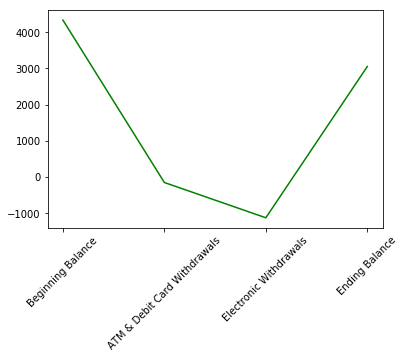

In [0]:
import matplotlib.pyplot as plt
plt.plot(labels, summary, color='g',markersize=14)
plt.xticks(rotation=45)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

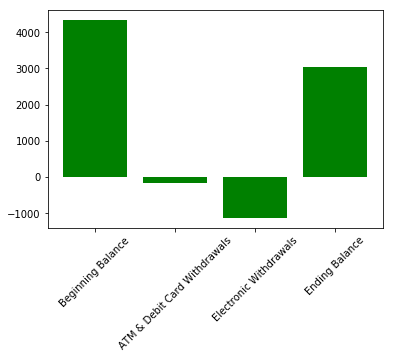

In [0]:
plt.bar(labels,summary,label="Example two", color='g')
plt.xticks(rotation=45)


In [0]:
import re

#This scrapes data from 
def cleanDates(trans_details):
  n_date =[]
  for date in trans_details:
    isMatch = re.match('^\d{2}\/\d{2}', date)
    if isMatch and len(date)==5:
      #print(date)
      n_date.append(date)
  return n_date

def getMonths(dates):
  months=[]
  for month in dates:
    months.append(month[0:2])
  return months


dates = cleanDates(trans_details)
print(len(dates))

months =  getMonths(dates)
#months
dates

18


['01/22',
 '01/22',
 '01/22',
 '01/24',
 '01/25',
 '01/25',
 '01/28',
 '01/28',
 '01/28',
 '01/28',
 '01/28',
 '01/28',
 '01/28',
 '02/04',
 '02/05',
 '02/05',
 '02/11',
 '02/13']

In [0]:
#Adjust the page number.
#Test which is the start page where the transaction details are
#If you give a page which does not have table then tabula will throw an exception

startpage=0
for page in range(no_of_pages):
  try:
    text = convert_pdf_to_txt('/content/drive/My Drive/s2.pdf', pages=[page])
    arr = text.split('\n')
    index = arr.index('*start*transaction detail')
    if(index>=0):
      break
  except ValueError:
    startpage = startpage + 1
    
startpage




{0}


0

In [0]:
!pip install tabula-py

     |████████████████████████████████| 20.4MB 2.7MB/s 


In [0]:
#from tabula import wrapper


#for page in range(startpage,)
#tables = wrapper.read_pdf("/content/drive/My Drive/s2.pdf",multiple_tables=True, pages=0)

#print(len(tables[0][2]))
#for table in tables:
 # for tab in range(len(table[0][2])):
  #  print(tables[0][2][tab])


In [0]:
import os
#os.path.abspath("E:/Documents/myPy/")
#Strange observation: 1) Though pages all means iterating all the pages and multi tables true should help to accumulate multiple table. But it has only one
# 2) All the first page where the transaction starts like s4,s6 does fine  or has 0,1 as amounts otherwise it is on 0,2 
from tabula import wrapper
import re
import math
balance=[]
amount=[]
description=[]
  #print(len(tables[0][1]))

for page in range(startpage,no_of_pages):
  print(page)
  try:
    tables = wrapper.read_pdf("/content/drive/My Drive/s2.pdf",multiple_tables=True, pages=page+1)
    print(tables[0][2])
    if((page)==startpage):
      try:

        for tab in range(len(tables[0][1])):
              amount.append(tables[0][1][tab])

      except:
        print("Amount Hi")
    else:
      try:

        for tab in range(len(tables[0][2])):
              amount.append(tables[0][2][tab])

      except:
        print("Amount Hi")



    try:

      for tab in range(len(tables[0][0])):
            description.append(tables[0][0][tab])
    except:
      print(" Description Hi")

    if((page)==startpage):
      try:

        for tab in range(len(tables[0][2])):
              balance.append(tables[0][2][tab])
      except:
        print("Balance Hi")
    else:
      try:

        for tab in range(len(tables[0][3])):
              balance.append(tables[0][3][tab])
      except:
        print("Balance Hi")

    #balance
    #cleanedList = [x for x in balance if str(x) != 'nan']
    #cleanedlist = [x for x in balance if x != 'nan']
    #cleanedList

    #amount
    print(amount)
    print(balance)
  except:
    print("table error")

    #print(tables[0][2][tab])
#for tab in range(len(tables[0][1])):
# print(tables[0][1][tab])



    
  






0
0           NaN
1     $4,337.88
2      3,937.88
3      3,927.92
4           NaN
5      3,892.92
6      3,891.92
7           NaN
8      3,885.67
9           NaN
10     3,880.72
11          NaN
12     3,870.51
13          NaN
14     3,868.77
15          NaN
16     3,138.77
17     3,136.02
18          NaN
19     3,133.27
20          NaN
21     3,130.77
22          NaN
23     3,128.27
24          NaN
25          NaN
Name: 2, dtype: object
[nan, nan, '-400.00', '-9.96', nan, '-35.00', '-1.00', nan, '-6.25', nan, '-4.95', nan, '-10.21', nan, '-1.74', nan, '-730.00', '-2.75', nan, '-2.75', nan, '-2.50', nan, '-2.50', nan, nan]
[nan, '$4,337.88', '3,937.88', '3,927.92', nan, '3,892.92', '3,891.92', nan, '3,885.67', nan, '3,880.72', nan, '3,870.51', nan, '3,868.77', nan, '3,138.77', '3,136.02', nan, '3,133.27', nan, '3,130.77', nan, '3,128.27', nan, nan]
1
0        NaN
1     -57.03
2        NaN
3      -1.00
4        NaN
5      -1.00
6        NaN
7     -14.85
8        NaN
9      -1.00
10      

In [0]:
def cleanDescription(description):
  cleanedDescription=[]
  for desc in description:
    des = desc.split()
    #print(des[0])
    if(re.match("^\d{2}\/\d{2}",str(des[0]))):
      #print(desc[5:])
      cleanedDescription.append(desc[5:])
  return cleanedDescription

In [0]:
def cleanAmountAndBalance(money):
  cleanedList = [x for x in money if str(x) != 'nan']
  cleanedList = [s.replace(',','') for s in cleanedList]
  for i in range(len(cleanedList)):
   
    if(cleanedList[i][0] == '$'):
      
      cleanedList[i] = cleanedList[i][1:]
      print(cleanedList[i])
  return cleanedList

In [0]:
print(amount)
cleanedAmount = cleanAmountAndBalance(amount)
cleanedAmount = [float(i) for i in cleanedAmount]
cleanedAmount
len(cleanedAmount)

[nan, nan, '-400.00', '-9.96', nan, '-35.00', '-1.00', nan, '-6.25', nan, '-4.95', nan, '-10.21', nan, '-1.74', nan, '-730.00', '-2.75', nan, '-2.75', nan, '-2.50', nan, '-2.50', nan, nan, nan, '-57.03', nan, '-1.00', nan, '-1.00', nan, '-14.85', nan, '-1.00', nan]


18

In [0]:
cleanedBalance = cleanAmountAndBalance(balance)
cleanedBalance = [float(i) for i in cleanedBalance]
cleanedBalance = cleanedBalance[1:]
if len(cleanedBalance)>len(cleanedAmount):
  cleanedBalance = cleanedBalance[:len(cleanedBalance)-1]

len(cleanedBalance)


4337.88


18

In [0]:
cleanedDescription = cleanDescription(description)
cleanedDescription
len(cleanedDescription)

18

In [0]:
import pandas as pd
bankStatementInfo = pd.DataFrame({
                              'Dates': dates,
                              'Months': months,
                              'Description':cleanedDescription,
                              'Amount': cleanedAmount,
                              'Balance': cleanedBalance
})
print(bankStatementInfo.info())
print(bankStatementInfo.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
Dates          18 non-null object
Months         18 non-null object
Description    18 non-null object
Amount         18 non-null float64
Balance        18 non-null float64
dtypes: float64(2), object(3)
memory usage: 800.0+ bytes
None
   Dates Months  ...  Amount  Balance
0  01/22     01  ... -400.00  3937.88
1  01/22     01  ...   -9.96  3927.92
2  01/22     01  ...  -35.00  3892.92
3  01/24     01  ...   -1.00  3891.92
4  01/25     01  ...   -6.25  3885.67
5  01/25     01  ...   -4.95  3880.72
6  01/28     01  ...  -10.21  3870.51
7  01/28     01  ...   -1.74  3868.77
8  01/28     01  ... -730.00  3138.77
9  01/28     01  ...   -2.75  3136.02

[10 rows x 5 columns]


In [0]:
from pathlib import Path
my_file = Path("/content/drive/My Drive/bankStatements.csv")
if my_file.is_file():
		bankStatementInfo.to_csv('/content/drive/My Drive/bankStatements.csv',index=False,header=False,sep=',',mode='a')
else:
  bankStatementInfo.to_csv('/content/drive/My Drive/bankStatements.csv',index=False,sep=',',mode='a')


In [0]:
ism = re.match("^\d{2}\/\d{2}",'01/22')
if ism:
  print("Hi")

Hi


In [0]:
import pandas as pd
 
data_url = '/content/drive/My Drive/bankStatements.csv'
df = pd.read_csv('/content/drive/My Drive/bankStatements.csv',error_bad_lines=False)
#print("Hello")
print(df.head(10))
df_rank = df.groupby('Months')
#print(df_rank.head(10))
month=3
dates = []
amount = []
for i in range(len(df)):
	if df.iloc[i]['Months'] == 2:
		dates.append(df.iloc[i]['Dates'])
		amount.append(df.iloc[i]['Amount'])
		
#print(dates)
grouped_dates=[]
dayExpense=[]
prevDate = dates[0].split('/')[1]
sum=0
print(prevDate)
for d,a in zip(dates,amount):
	if d.split('/')[1] == prevDate:
		sum=sum+a
	else:
		grouped_dates.append(prevDate)
		dayExpense.append(sum)
		sum = a
		prevDate = d.split('/')[1]
grouped_dates.append(prevDate)	
dayExpense.append(sum)
print(" ")
print("Dates")
print(grouped_dates)
print(" ")
print('Expense per date')
print(dayExpense)

   Dates  Months  ...  Amount  Balance
0  01/22       1  ... -400.00  3937.88
1  01/22       1  ...   -9.96  3927.92
2  01/22       1  ...  -35.00  3892.92
3  01/24       1  ...   -1.00  3891.92
4  01/25       1  ...   -6.25  3885.67
5  01/25       1  ...   -4.95  3880.72
6  01/28       1  ...  -10.21  3870.51
7  01/28       1  ...   -1.74  3868.77
8  01/28       1  ... -730.00  3138.77
9  01/28       1  ...   -2.75  3136.02

[10 rows x 5 columns]
04
 
Dates
['04', '05', '11', '13']
 
Expense per date
[-57.03, -2.0, -14.85, -1.0]


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

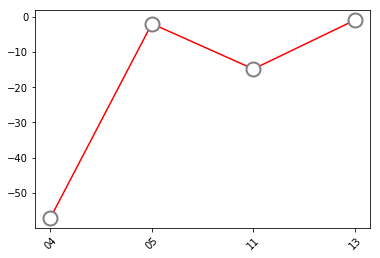

In [0]:
import matplotlib.pyplot as plt
plt.plot(grouped_dates,dayExpense,'-ok',color='r',markersize=14 ,markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
plt.xticks(rotation=45)

<BarContainer object of 4 artists>

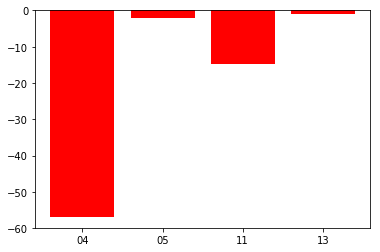

In [0]:
temp1=[]
temp2=[]
temp3=[]
temp4=[]
count=0
for i in dayExpense:
		if i>0:
			temp1.append(i)
			temp3.append(grouped_dates[count])
		else:
			temp2.append(i)
			temp4.append(grouped_dates[count])
		count=count+1
			

		#plt.style.use('seaborn-whitegrid')
plt.bar(temp3,temp1,label="Example two", color='g')
plt.bar(temp4,temp2,label="Example two", color='r')

In [0]:
keyword = "Safeway"
keywordArr = keyword.split()
data_url = '/content/drive/My Drive/bankStatements.csv'
df = pd.read_csv(data_url)
amount =0
	#common = keyword
for i in range(len(df)):
		desc = df.iloc[i]['Description'].split()
		common = set(keywordArr).intersection( set(desc) )
		if len(common) > 0:
			 amount= amount+df.iloc[i]['Amount']
			  
print("Safeway")			
print(amount)

-35.02


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

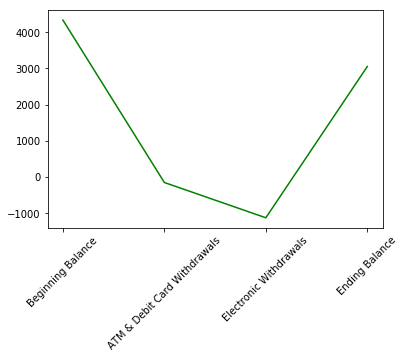

In [0]:
import matplotlib.pyplot as plt
plt.plot(labels, summary, color='g',markersize=14)
plt.xticks(rotation=45)